In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
4,341 cases (7 day average) as of Sun 06 Jun, +298.0 since Sat 05 Jun
112 hospitalised (7 day average) as of Tue 08 Jun, +4.6 since Mon 07 Jun
6 died (7 day average) as of Sun 06 Jun, +0.4 since Sat 05 Jun


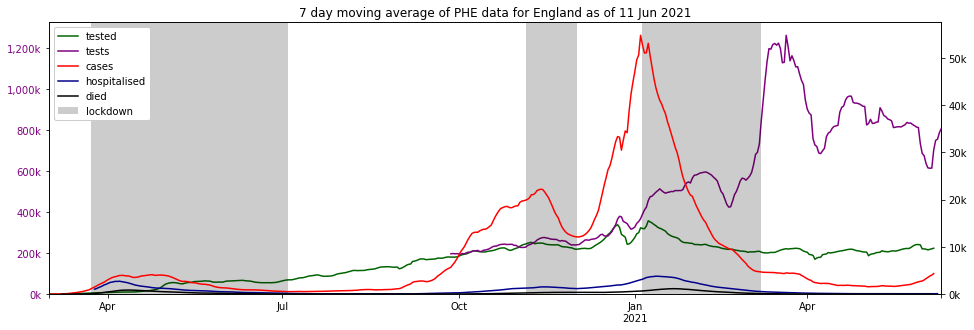

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

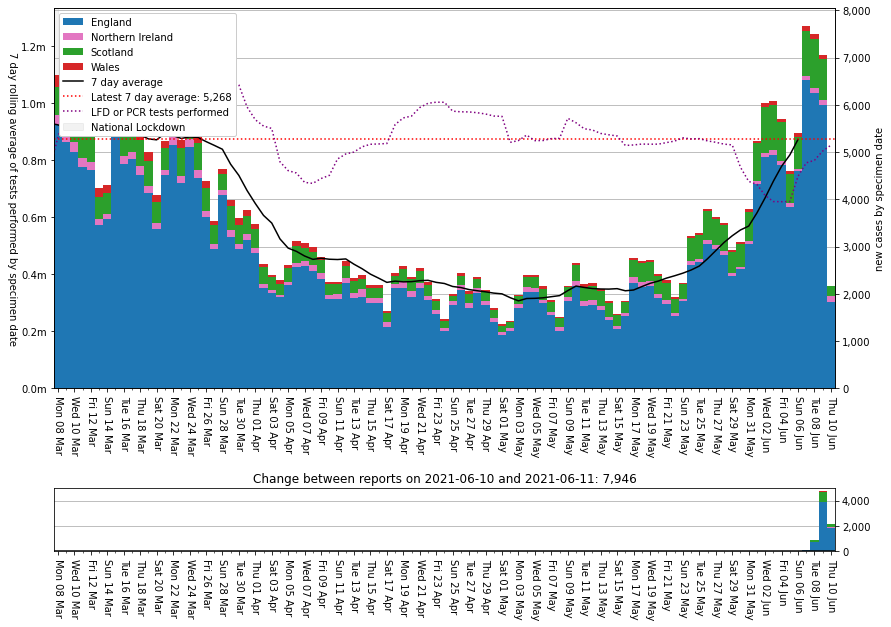

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

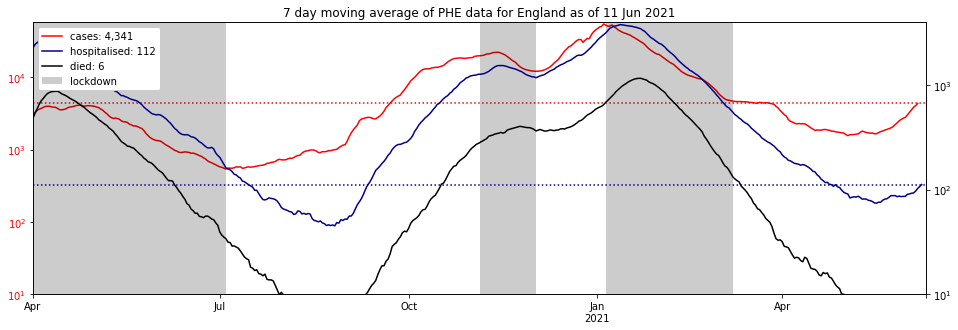

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

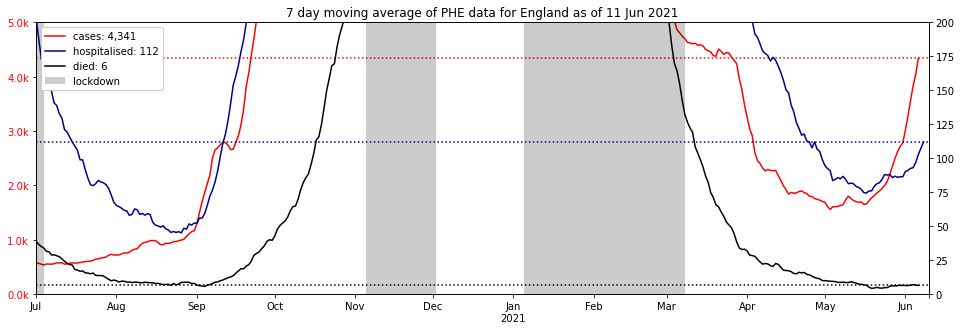

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,10 Jun 21,"+24,710,013","+34,321,990","+24,710,013","+248,650","+173,443","+248,650"
Northern Ireland,10 Jun 21,"+743,402","+1,105,767","+743,402","+7,212","+4,138","+7,212"
Scotland,10 Jun 21,"+2,375,246","+3,459,063","+2,375,246","+30,065","+17,846","+30,065"
Wales,10 Jun 21,"+1,336,479","+2,201,665","+1,336,479","+22,111","+6,180","+22,111"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,24710013.0,34321990.0,9611977.0,56286961,43.900066,17.076738,39.023196
1,Northern Ireland,N92000002,743402.0,1105767.0,362365.0,1893667,39.257272,19.135624,41.607104
2,Scotland,S92000003,2375246.0,3459063.0,1083817.0,5463300,43.476397,19.838138,36.685465
3,Wales,W92000004,1336479.0,2201665.0,865186.0,3152879,42.389162,27.441142,30.169696


'partial: 41,088,485 (61.5%), full: 29,165,140'

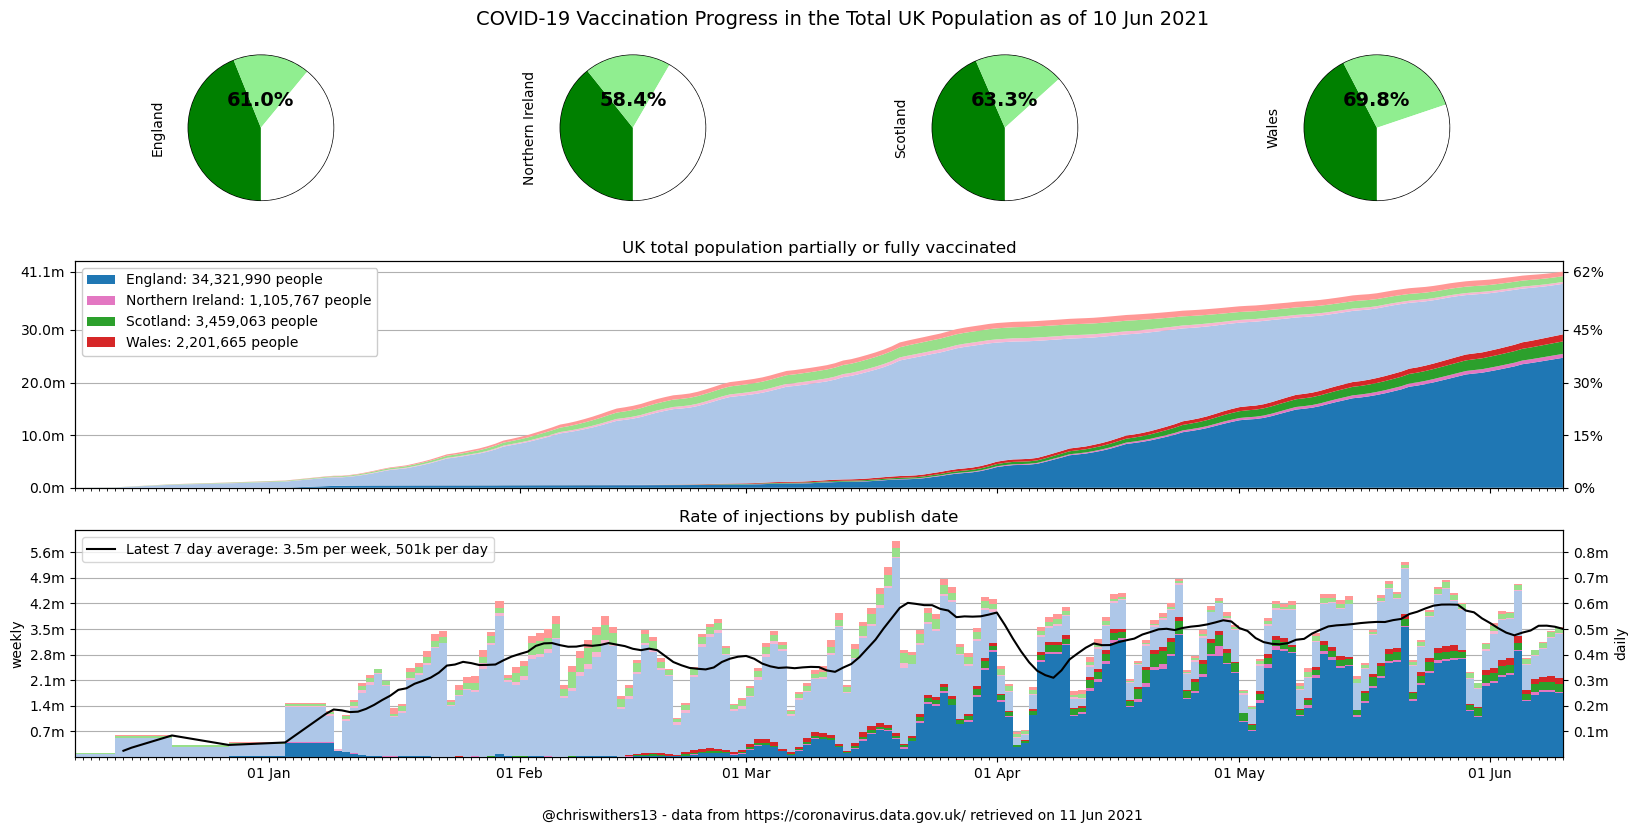

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

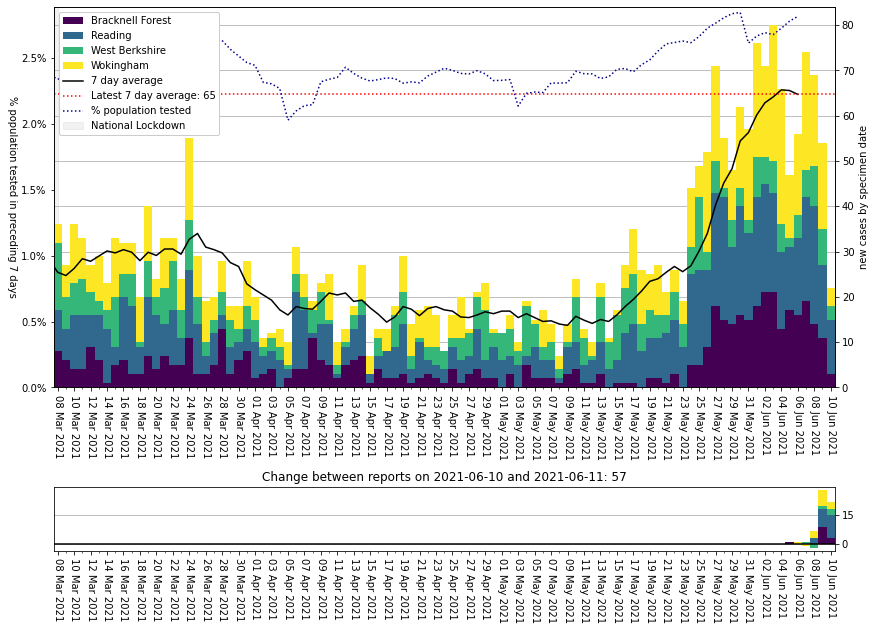

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=unique_people_tested)

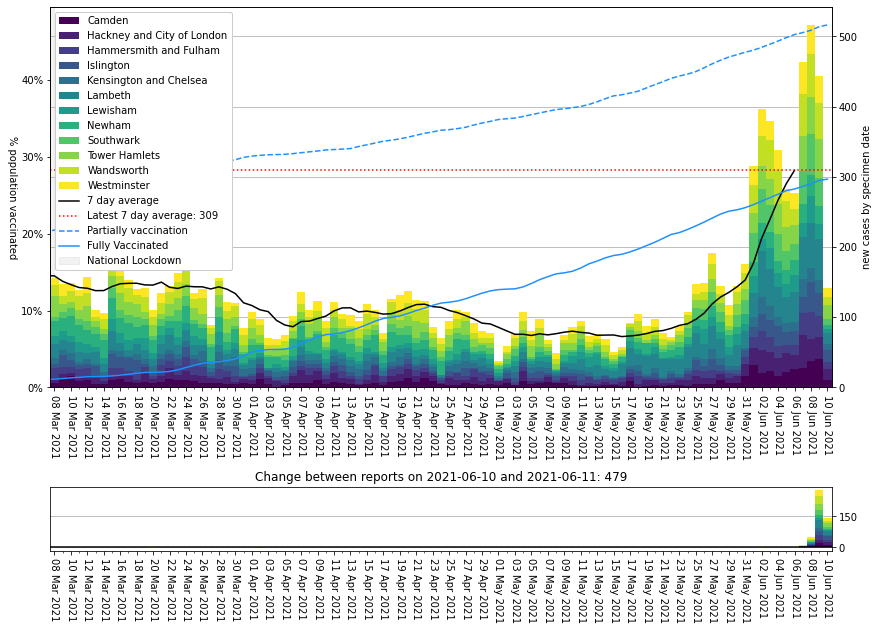

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000008,Blackburn with Darwen,510.367678,764.0,2021-06-10
E07000124,Ribble Valley,394.166338,240.0,2021-06-10
E07000120,Hyndburn,360.302555,292.0,2021-06-10
E07000125,Rossendale,314.764556,225.0,2021-06-10
E07000117,Burnley,308.142150,274.0,2021-06-10
E07000126,South Ribble,284.326822,315.0,2021-06-10
E08000006,Salford,263.489341,682.0,2021-06-10
E07000122,Pendle,258.381101,238.0,2021-06-10
E08000001,Bolton,256.998783,739.0,2021-06-10


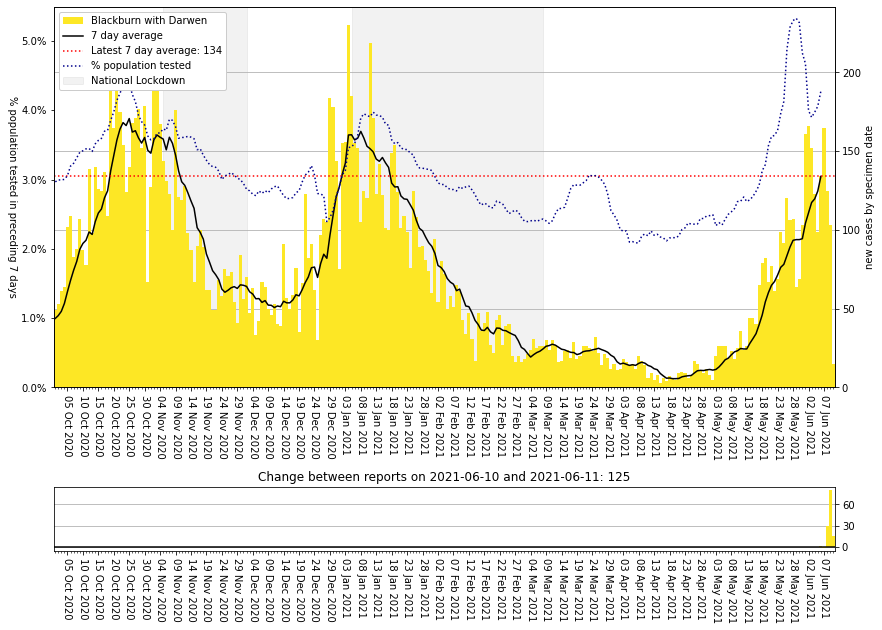

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000003,Manchester,249.973773,1382.0,2021-06-10
E08000035,Leeds,120.155483,953.0,2021-06-10
S12000049,Glasgow City,142.469042,902.0,2021-06-10
E08000025,Birmingham,74.617977,852.0,2021-06-10
S12000036,City of Edinburgh,152.972777,803.0,2021-06-10
E06000008,Blackburn with Darwen,510.367678,764.0,2021-06-10
E08000001,Bolton,256.998783,739.0,2021-06-10
E08000006,Salford,263.489341,682.0,2021-06-10
E08000010,Wigan,196.554515,646.0,2021-06-10


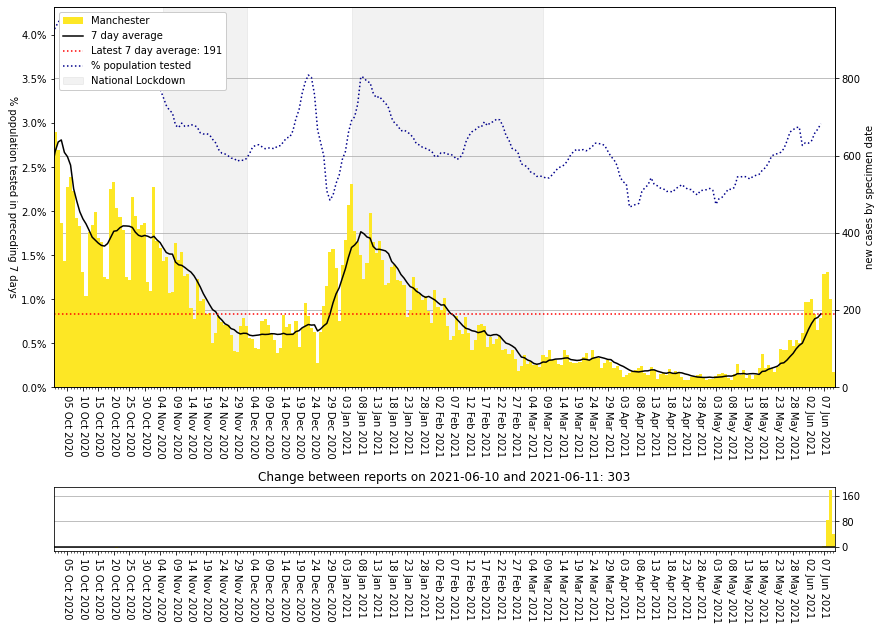

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.4

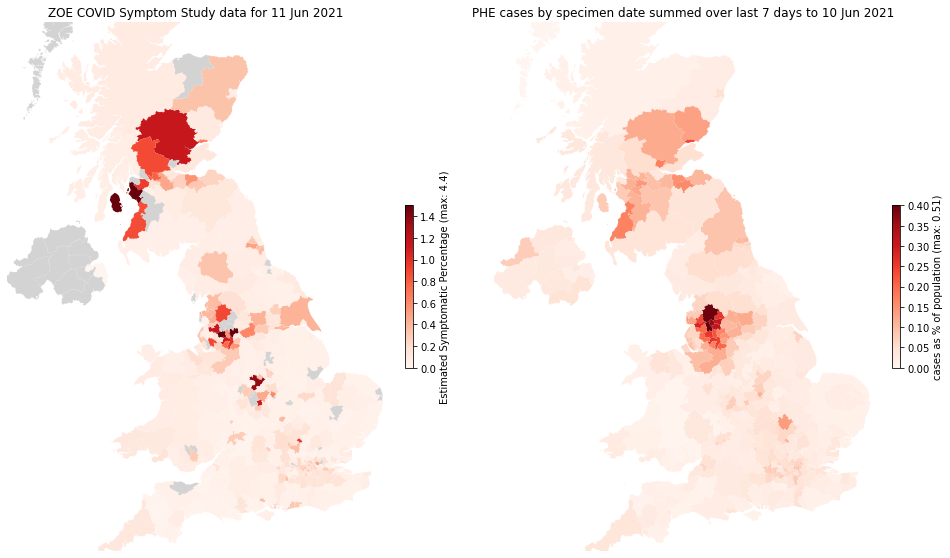

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...